In [1]:
import numpy as np
import matplotlib.pyplot as plt
import patsy
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score


In [2]:
df_movie=pd.read_csv('movie.csv',sep=';')
df_cost=pd.read_csv('cost.csv', sep=';')

In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    6442 non-null   object
 1   Release_year  6442 non-null   int64 
 2   Minutes       6442 non-null   int64 
 3   Movie_Rating  6442 non-null   int64 
 4   Votes         6442 non-null   int64 
 5   MetaScore     6442 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 302.1+ KB


In [4]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Name       478 non-null    object
 1   Production_cost  478 non-null    int64 
 2   Domestic_gross   478 non-null    int64 
 3   Worldwide_gross  478 non-null    int64 
 4   Genre            478 non-null    object
dtypes: int64(3), object(2)
memory usage: 18.8+ KB


In [5]:
df=pd.merge(df_movie,df_cost,on='Movie Name')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Name       451 non-null    object
 1   Release_year     451 non-null    int64 
 2   Minutes          451 non-null    int64 
 3   Movie_Rating     451 non-null    int64 
 4   Votes            451 non-null    int64 
 5   MetaScore        451 non-null    int64 
 6   Production_cost  451 non-null    int64 
 7   Domestic_gross   451 non-null    int64 
 8   Worldwide_gross  451 non-null    int64 
 9   Genre            451 non-null    object
dtypes: int64(8), object(2)
memory usage: 35.4+ KB


c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

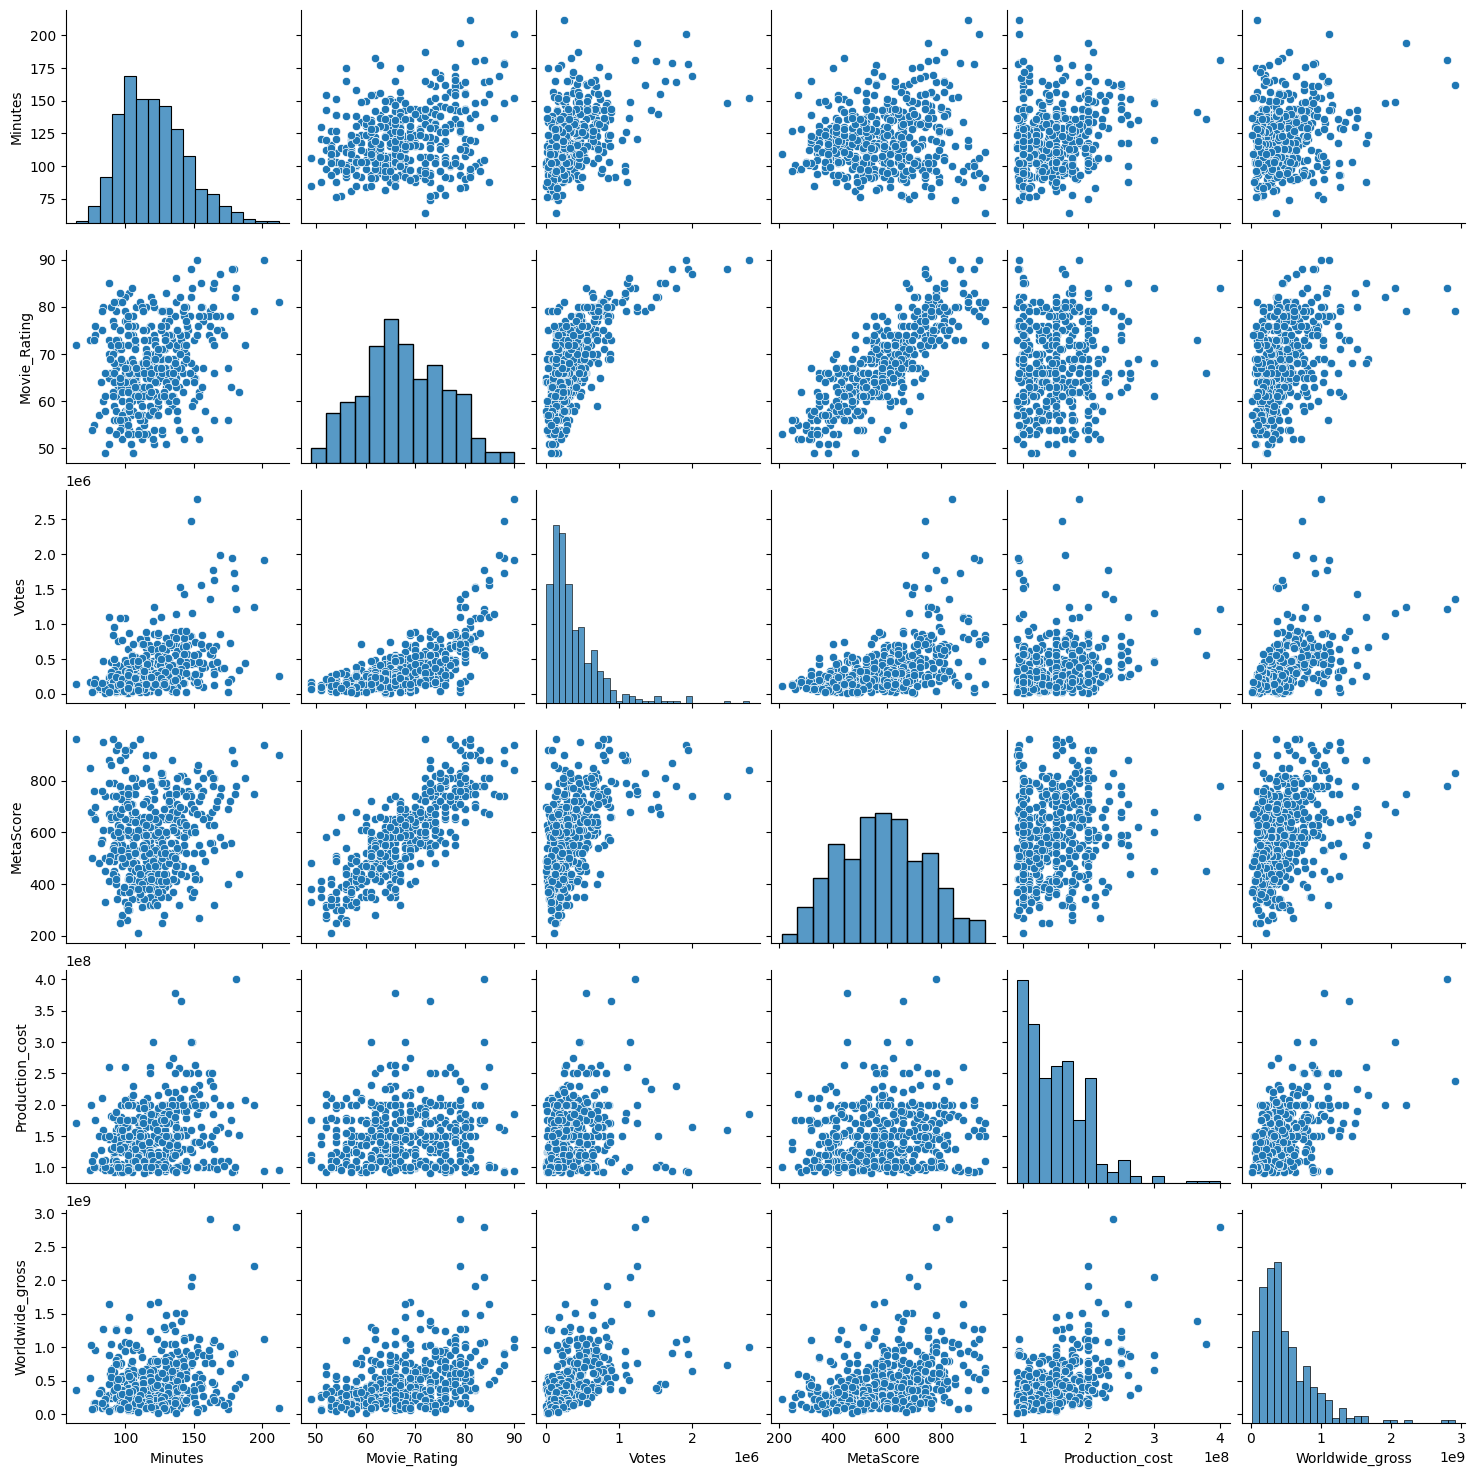

In [33]:
sns.pairplot(df)

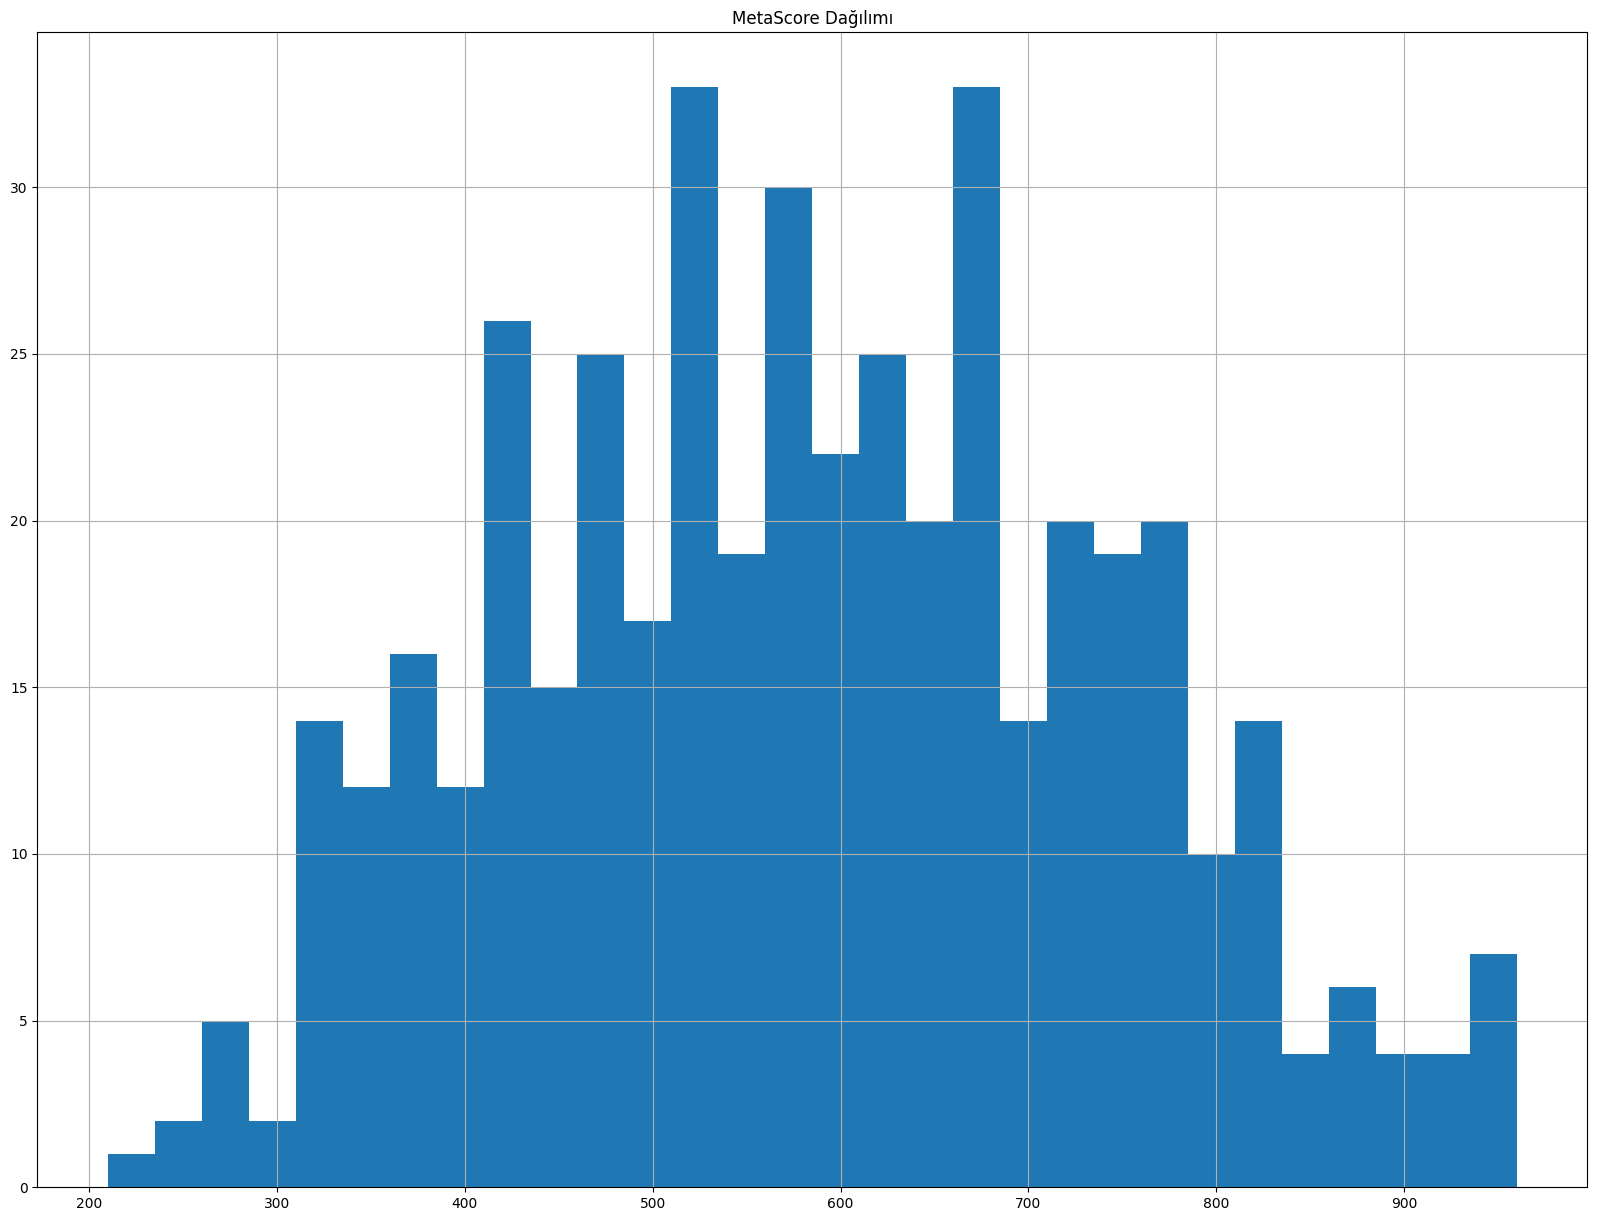

In [8]:
df['MetaScore'].hist(bins=30, figsize=(20,15))
plt.title('MetaScore Dağılımı')
plt.show()

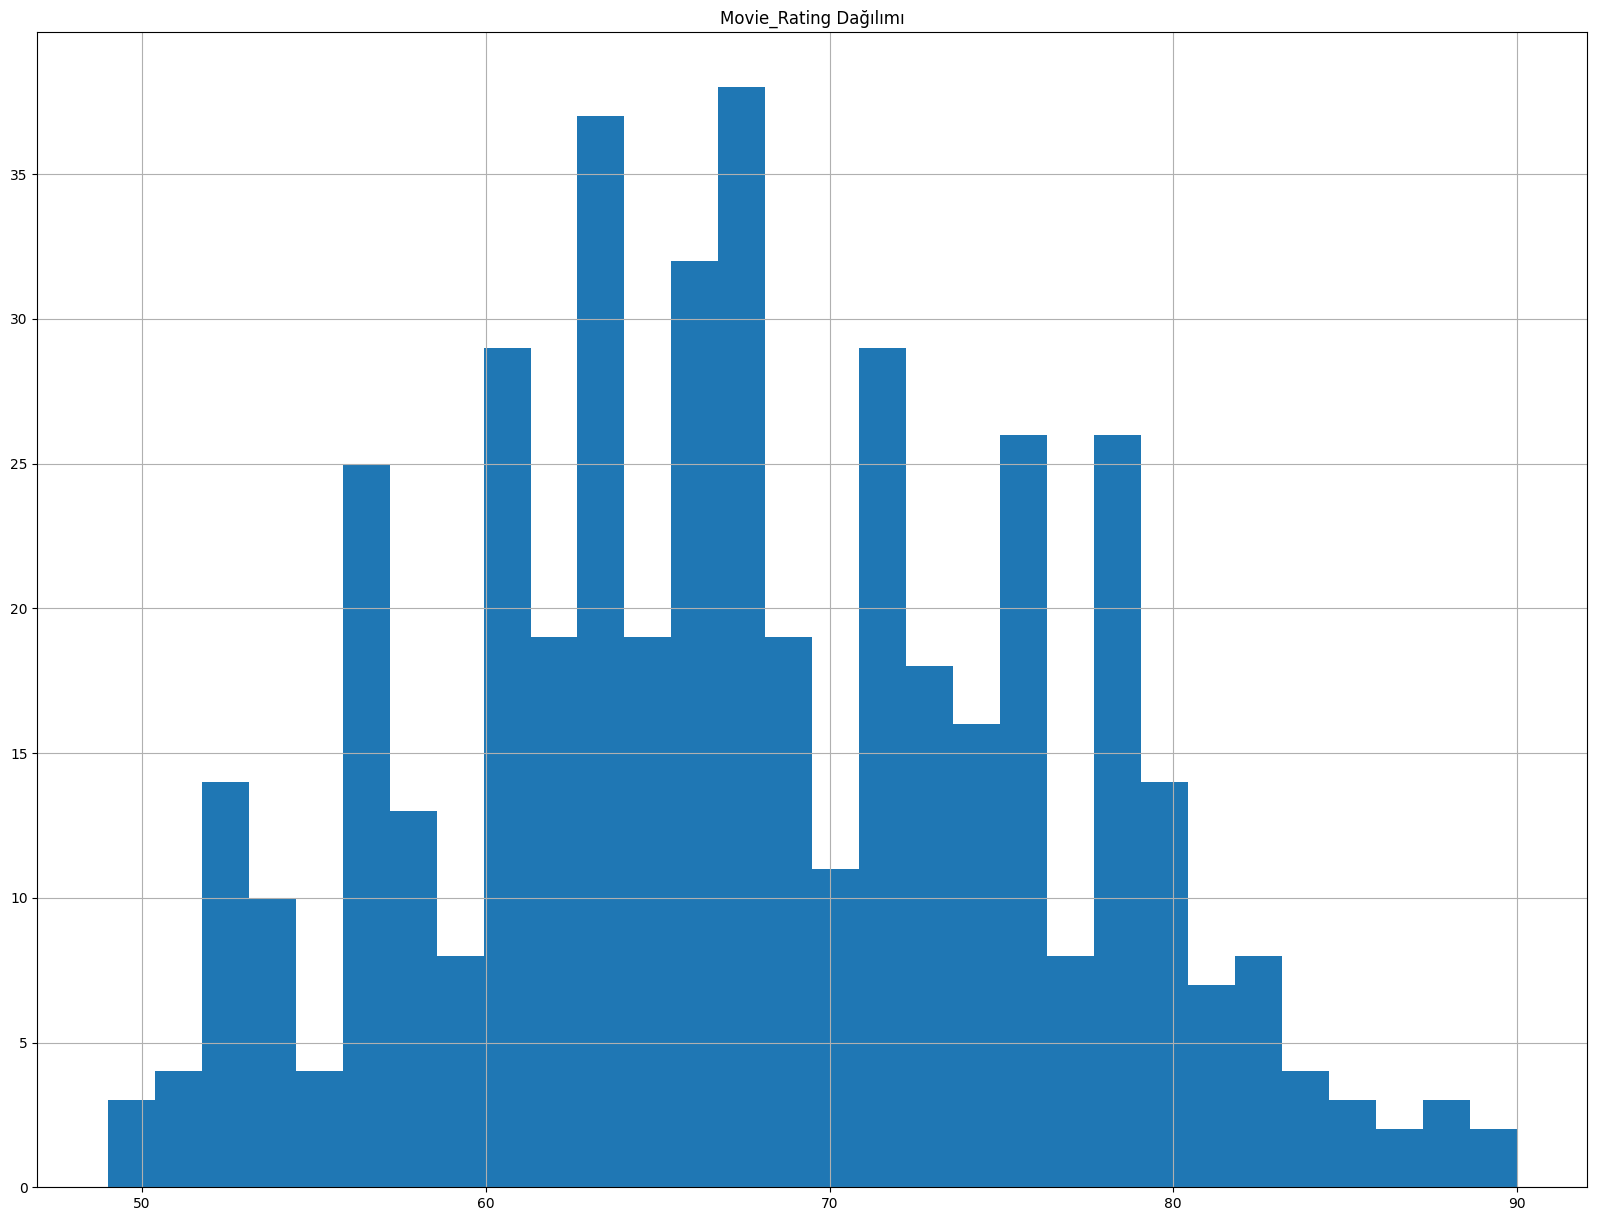

In [9]:

df['Movie_Rating'].hist(bins=30, figsize=(20,15))
plt.title('Movie_Rating Dağılımı')
plt.show()

In [10]:
df.head()

,Movie Name,Release_year,Minutes,Movie_Rating,Votes,MetaScore,Production_cost,Domestic_gross,Worldwide_gross,Genre
0,Rogue One: A Star Wars Story,2016,133,78,668814,650,200000000,533539991,1055083596,Adventure
1,Monster Trucks,2016,104,57,18371,410,125000000,33370166,61642798,Adventure
2,The 13th Warrior,1999,102,66,129683,420,125000000,32698899,61698899,Action
3,Final Fantasy: The Spirits Within,2001,106,64,83417,490,137000000,32131830,85131830,Adventure
4,Stealth,2005,121,51,55572,350,138000000,32116746,76416746,Action


In [11]:
df.drop(['Movie Name','Domestic_gross','Release_year','Genre'], axis=1, inplace=True)

In [12]:
df.corr()

,Minutes,Movie_Rating,Votes,MetaScore,Production_cost,Worldwide_gross
Minutes,1.000000,0.271282,0.449051,0.124842,0.220412,0.226057
Movie_Rating,0.271282,1.000000,0.677365,0.817511,0.099010,0.421468
Votes,0.449051,0.677365,1.000000,0.501887,0.219581,0.512907
MetaScore,0.124842,0.817511,0.501887,1.000000,0.102788,0.377760
Production_cost,0.220412,0.099010,0.219581,0.102788,1.000000,0.551486
Worldwide_gross,0.226057,0.421468,0.512907,0.377760,0.551486,1.000000


<Axes: >

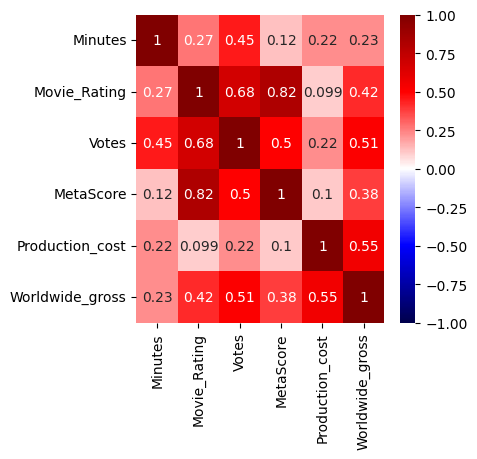

In [36]:
plt.figure(figsize=(4, 4))
sns.heatmap(df.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)

In [37]:

X = df.drop(columns=['Movie_Rating','Production_cost','Worldwide_gross','Minutes'])
X= sm.add_constant(X)
y = df['Movie_Rating']
new_model =sm.OLS(y, X).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Movie_Rating   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     723.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          4.69e-141
Time:                        05:48:53   Log-Likelihood:                -1280.9
No. Observations:                 451   AIC:                             2568.
Df Residuals:                     448   BIC:                             2580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3038      0.771     57.435      0.000      42.788      45.820
Votes       8.511e-06   6.33e-07     13.443      0.000    7.27e-06    9.76e-06
MetaScore      0.0344      0.001     24.039      0.000       0.032       0.037
==============================================================================
Omnibus:                        5.384   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.368
Skew:                          -0.206   Prob(JB):                       0.0683
Kurtosis:                       3.341   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

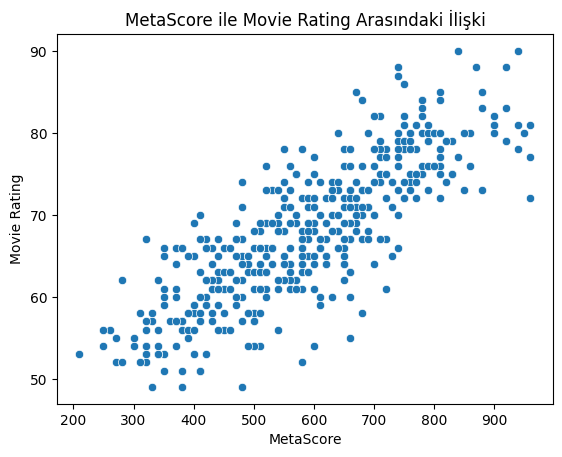

In [15]:
sns.scatterplot(data=df, x='MetaScore', y='Movie_Rating')
plt.title('MetaScore ile Movie Rating Arasındaki İlişki')
plt.xlabel('MetaScore')
plt.ylabel('Movie Rating')
plt.show()

c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Movie Rating')

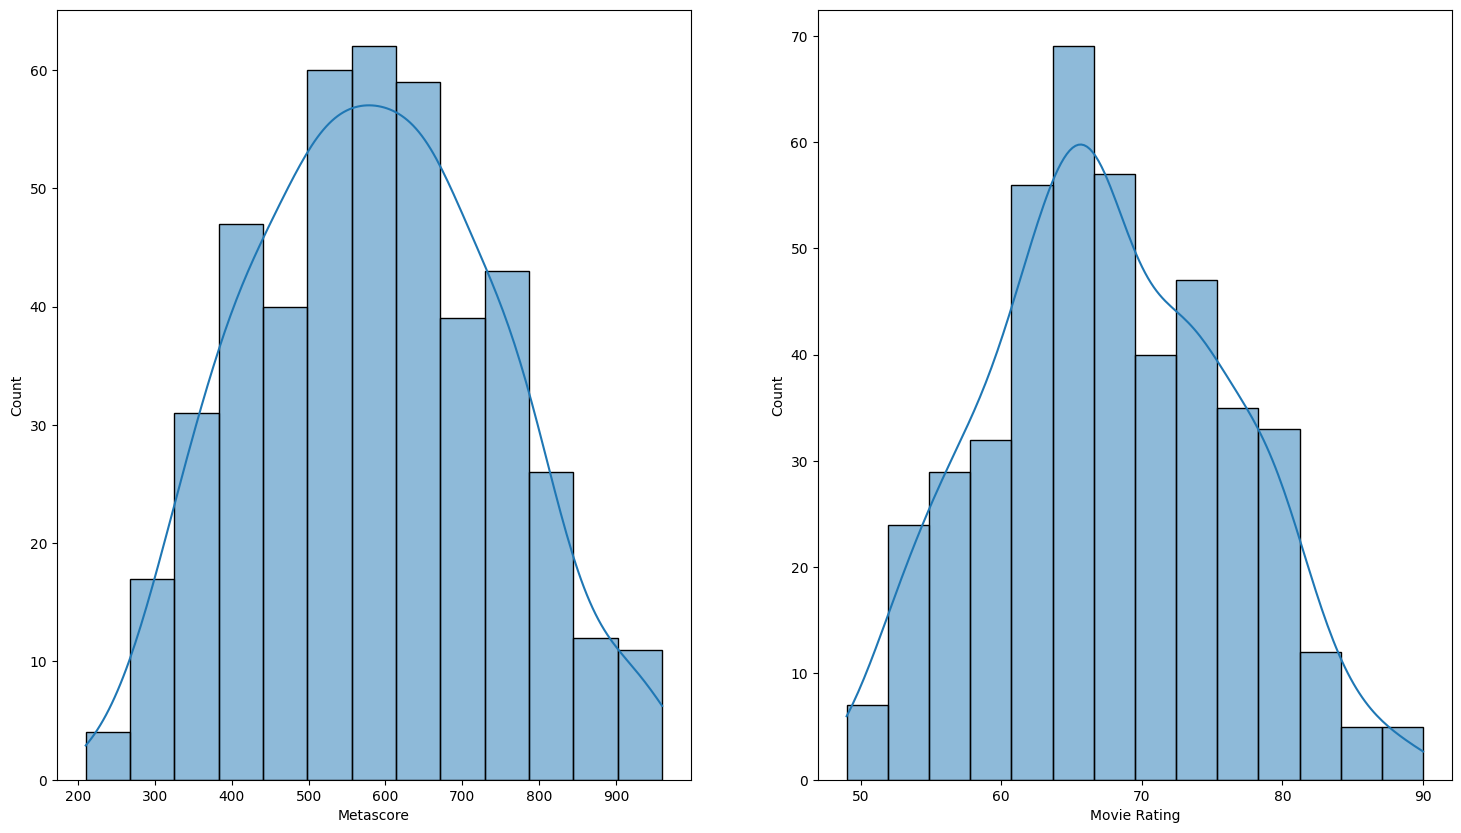

In [16]:
plt.figure(figsize=(18, 10))



plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MetaScore', kde=True)
plt.xlabel('Metascore')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Movie_Rating', kde=True)
plt.xlabel('Movie Rating')

In [17]:

correlation = df['MetaScore'].corr(df['Movie_Rating'])
print("Pearson Korelasyon Katsayısı:", correlation)


Pearson Korelasyon Katsayısı: 0.8175108524764335


In [18]:
df.head()

,Minutes,Movie_Rating,Votes,MetaScore,Production_cost,Worldwide_gross
0,133,78,668814,650,200000000,1055083596
1,104,57,18371,410,125000000,61642798
2,102,66,129683,420,125000000,61698899
3,106,64,83417,490,137000000,85131830
4,121,51,55572,350,138000000,76416746


In [19]:
X = df[['MetaScore']]
y = df['Movie_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(mse)
msa=mean_absolute_error(y_test, y_pred)
print(msa)
r2 = r2_score(y_test, y_pred)
print(r2)

29.060570021369905
4.412812645690583
0.6206020842840501


In [38]:
new_model2 = smf.ols('Movie_Rating ~ MetaScore + Votes' , data=df).fit()
new_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Movie_Rating   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     723.8
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          4.69e-141
Time:                        05:51:42   Log-Likelihood:                -1280.9
No. Observations:                 451   AIC:                             2568.
Df Residuals:                     448   BIC:                             2580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.3038      0.771     57.435      0.000      42.788      45.820
MetaScore      0.0344      0.001     24.039      0.000       0.032       0.037
Votes       8.511e-06   6.33e-07     13.443      0.000    7.27e-06    9.76e-06
==============================================================================
Omnibus:                        5.384   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.368
Skew:                          -0.206   Prob(JB):                       0.0683
Kurtosis:                       3.341   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X= df.drop(columns=['Movie_Rating','Production_cost','Worldwide_gross','Minutes'])
y= df['Movie_Rating']

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape , 'X_train shape')
print(x_test.shape, 'x_test shape')
print(Y_train.shape, 'y_train shape')
print(y_test.shape, 'y_test shape')

(360, 2) X_train shape
(91, 2) x_test shape
(360,) y_train shape
(91,) y_test shape


In [23]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print(x_train.shape, 'x_train shape')
print(x_val.shape, 'x_val shape')
print(y_train.shape, 'y_train shape')
print(y_val.shape, 'y_val shape')


(270, 2) x_train shape
(90, 2) x_val shape
(270,) y_train shape
(90,) y_val shape


In [41]:
from sklearn.preprocessing import StandardScaler
lm=LinearRegression()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=1)

poly= PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train.values)
x_val_poly = poly.transform(x_val.values)
x_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()

In [42]:
lm.fit(x_train, y_train)
print(f'Linear Regression R2: {lm.score(x_val, y_val):.3f}')

lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.3f}')

lm_poly.fit(x_train_poly, y_train)
print(f'Polynomial Regression R2: {lm_poly.score(x_val_poly, y_val):.3f}')

Linear Regression R2: 0.806
Ridge Regression R2: 0.806
Polynomial Regression R2: 0.824


In [26]:
scores = []
poly_degrees = 5

for degree in range(1, poly_degrees+1):
    
    poly = PolynomialFeatures(degree=degree)
    
    x_train_poly = poly.fit_transform(x_train.values)
    x_val_poly = poly.transform(x_val.values)
    
    lm_poly = LinearRegression()

    lm_poly.fit(x_train_poly, y_train)

    scores.append(lm_poly.score(x_val_poly, y_val))

    
for degree, score in enumerate(scores):
    print(f"Polynomial Degree: {degree+1}, Validation Score: {score:.5f}")

Polynomial Degree: 1, Validation Score: 0.80567
Polynomial Degree: 2, Validation Score: 0.82448
Polynomial Degree: 3, Validation Score: 0.82226
Polynomial Degree: 4, Validation Score: 0.42723
Polynomial Degree: 5, Validation Score: -9.94302


2. dereceden Polinomal regresyon ile en yüksek skoru elde edebiliyoruz 0.824

In [27]:
X_scaled = scaler.fit_transform(X_train.values)
lm_poly.fit(X_scaled, Y_train)
print(f'Polynomial Regression Test R2: {lm_poly.score(X_scaled, Y_train):.3f}')

Polynomial Regression Test R2: 0.774


In [28]:
lm_poly = LinearRegression()

cv_scores_poly = cross_val_score(lm_poly, X_scaled, Y_train, cv=5)

print("Cross Validation Scores (Polynomial Regression):", cv_scores_poly)

print("Mean Cross Validation Score (Polynomial Regression):", np.mean(cv_scores_poly))

Cross Validation Scores (Polynomial Regression): [0.7689258  0.73430352 0.81912823 0.66588529 0.81376523]
Mean Cross Validation Score (Polynomial Regression): 0.7604016140030019


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.values)

lm_ridge = Ridge(alpha=1)

cv_scores_ridge = cross_val_score(lm_ridge, X_scaled, Y_train, cv=5)

print("Cross Validation Scores (Ridge):", cv_scores_ridge)

print("Mean Cross Validation Score (Ridge):", np.mean(cv_scores_ridge))

Cross Validation Scores (Ridge): [0.76916691 0.73447671 0.81885559 0.66622804 0.81339678]
Mean Cross Validation Score (Ridge): 0.7604248047959117


In [30]:
models = ['Polynomial Regression', 'Ridge Regression']

cv_scores = [np.mean(cv_scores_poly), np.mean(cv_scores_ridge)]
cv_std = [np.std(cv_scores_poly), np.std(cv_scores_ridge)]


results = pd.DataFrame({
    'Model': models,
    'Cross Validated Score (Mean)': cv_scores,
    'Cross Validated Score (Std)': cv_std
})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Ridge Regression,0.760425,0.05629
Polynomial Regression,0.760402,0.05654


In [31]:
df.to_pickle('data/movie.pkl')